# 데이터 불러오기

In [27]:
import pandas as pd
surgery = pd.read_csv('./datasets/ThoraricSurgery.csv', header=None)

In [28]:
surgery[17].value_counts()

0    400
1     70
Name: 17, dtype: int64

In [29]:
X = surgery.drop(17, axis=1)
y = surgery[[17]]

# train / test 데이터 나누기

In [30]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=11)

# 딥러닝 구조 결정 & 실행
- 은닉층 30개
- 출력층 1개 -> 나머지 하나는 자동으로 결정

In [31]:
import tensorflow
import numpy as np

np.random.seed(3)
tensorflow.random.set_seed(3)

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(30, input_dim=17, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [38]:
# 정해진 모델을 컴퓨터가 알아들을 수 있게끔 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 수행
history = model.fit(X_train, y_train, epochs=50, batch_size=10)

Epoch 1/50
38/38 [==============================] - 0s 773us/step - loss: 0.4484 - accuracy: 0.8457
Epoch 2/50
38/38 [==============================] - 0s 849us/step - loss: 0.4048 - accuracy: 0.8431
Epoch 3/50
38/38 [==============================] - 0s 858us/step - loss: 0.4274 - accuracy: 0.8431
Epoch 4/50
38/38 [==============================] - 0s 942us/step - loss: 0.4290 - accuracy: 0.8404
Epoch 5/50
38/38 [==============================] - 0s 840us/step - loss: 0.4459 - accuracy: 0.8351
Epoch 6/50
38/38 [==============================] - 0s 894us/step - loss: 0.4566 - accuracy: 0.8457
Epoch 7/50
38/38 [==============================] - 0s 893us/step - loss: 0.3930 - accuracy: 0.8457
Epoch 8/50
38/38 [==============================] - 0s 812us/step - loss: 0.3915 - accuracy: 0.8484
Epoch 9/50
38/38 [==============================] - 0s 786us/step - loss: 0.4152 - accuracy: 0.8537
Epoch 10/50
38/38 [==============================] - 0s 796us/step - loss: 0.4018 - accuracy: 0.8457

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 30)                540       
                                                                 
 dense_5 (Dense)             (None, 1)                 31        
                                                                 
Total params: 571
Trainable params: 571
Non-trainable params: 0
_________________________________________________________________


In [42]:
acc = history.history['accuracy']
loss = history.history['loss']

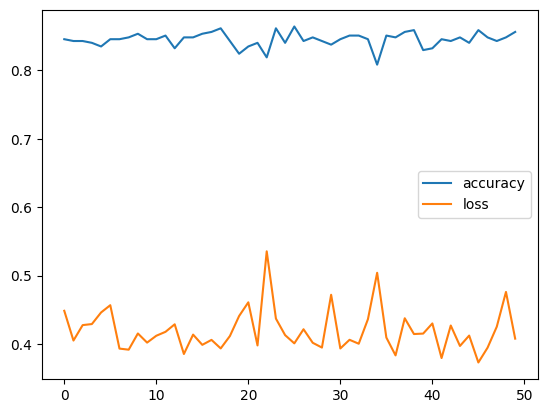

In [46]:
import matplotlib.pyplot as plt

plt.plot(acc, label='accuracy')
plt.plot(loss, label='loss')
plt.legend()
plt.show()

## 예측 & 평가

In [48]:
model.predict(X_test)

3/3 [==============================] - 2s 2ms/step


array([[1.28786191e-01],
       [1.03735350e-01],
       [2.13683754e-01],
       [3.66960466e-02],
       [3.45087264e-10],
       [2.36626923e-01],
       [1.87522396e-01],
       [3.91265601e-01],
       [1.96498394e-01],
       [1.16705827e-01],
       [1.83609247e-01],
       [3.05039771e-02],
       [6.45105779e-01],
       [1.63199171e-01],
       [5.83258420e-02],
       [4.77153398e-02],
       [1.17696889e-01],
       [2.08853379e-01],
       [1.59248084e-01],
       [3.57863046e-02],
       [2.23533988e-01],
       [1.67070150e-01],
       [1.97944477e-01],
       [2.70809323e-01],
       [9.06088725e-02],
       [1.88840166e-01],
       [1.21611401e-01],
       [6.29631951e-02],
       [3.43191028e-02],
       [1.38037801e-01],
       [1.20247528e-01],
       [6.20683692e-02],
       [2.28855088e-01],
       [1.91111490e-01],
       [9.88014415e-02],
       [5.38937673e-02],
       [4.92304713e-02],
       [3.79923344e-01],
       [2.10920423e-01],
       [1.67619750e-01],


In [49]:
model.evaluate(X_test, y_test)

3/3 [==============================] - 0s 2ms/step - loss: 0.6336 - accuracy: 0.8404


[0.6336330771446228, 0.8404255509376526]

# Pima Indian (이진 분류)

## 데이터 불러오기

In [57]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./datasets/diabetes.csv')
df.columns = ["pregnant",'plasma','pressure','thickness','insulin', 'BMI','pedigree','age','class']

In [60]:
df.describe()

,pregnant,plasma,pressure,thickness,insulin,BMI,pedigree,age,class
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## 임신 횟수 당 당뇨병 발병 확률

In [61]:
df[['pregnant', 'class']].groupby(['pregnant'], as_index=False).mean().sort_values(by='pregnant', ascending=True)

,pregnant,class
0,0,0.342342
1,1,0.214815
2,2,0.184466
3,3,0.360000
4,4,0.338235
5,5,0.368421
6,6,0.320000
7,7,0.555556
8,8,0.578947
9,9,0.642857


## 데이터 간의 상관관계

<AxesSubplot: >

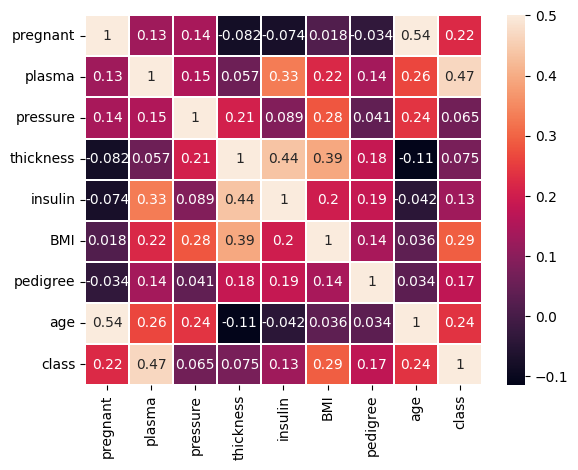

In [63]:
sns.heatmap(df.corr(), linewidths=0.1, vmax=0.5, annot=True)

## plasma와 class 관계 시각화

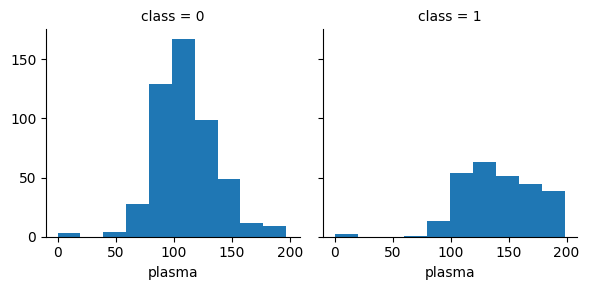

In [69]:
grid = sns.FacetGrid(df, col='class')
grid.map(plt.hist, 'plasma', bins=10)
plt.show()

## 모델 설정

In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

import numpy as np
import tensorflow as tf

np.random.seed(3)
tf.random.set_seed(3)

In [72]:
X = df.drop('class', axis=1)
y = df[['class']]

In [74]:
model = Sequential()
model.add(Dense(12, input_dim=8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

## 모델 컴파일 & 실행

In [75]:
# 모델 컴파일
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

# 모델 실행
model.fit(X, y, epochs=100, batch_size=10)

Epoch 1/100
77/77 [==============================] - 0s 1ms/step - loss: 4.4176 - accuracy: 0.5781
Epoch 2/100
77/77 [==============================] - 0s 1ms/step - loss: 1.9462 - accuracy: 0.6328
Epoch 3/100
77/77 [==============================] - 0s 2ms/step - loss: 1.5164 - accuracy: 0.6576
Epoch 4/100
77/77 [==============================] - 0s 1ms/step - loss: 1.2278 - accuracy: 0.6680
Epoch 5/100
77/77 [==============================] - 0s 953us/step - loss: 1.0377 - accuracy: 0.6549
Epoch 6/100
77/77 [==============================] - 0s 1ms/step - loss: 1.0075 - accuracy: 0.6562
Epoch 7/100
77/77 [==============================] - 0s 1ms/step - loss: 0.8789 - accuracy: 0.6862
Epoch 8/100
77/77 [==============================] - 0s 881us/step - loss: 0.8094 - accuracy: 0.6836
Epoch 9/100
77/77 [==============================] - 0s 934us/step - loss: 0.7578 - accuracy: 0.6784
Epoch 10/100
77/77 [==============================] - 0s 969us/step - loss: 0.7165 - accuracy: 0.7018
E

In [76]:
print('\n Accuracy: %.4f' % (model.evaluate(X,y)[1]))

24/24 [==============================] - 0s 2ms/step - loss: 0.4830 - accuracy: 0.7708

 Accuracy: 0.7708


# IRIS 데이터 (다중 분류)

## 데이터 불러오기

In [99]:
from sklearn.datasets import load_iris
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import LabelEncoder

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

In [100]:
np.random.seed(3)
tf.random.set_seed(3)

In [101]:
df = load_iris()
X = df.data
y = df.target

## y값 원핫인코딩

In [102]:
from tensorflow.keras.utils import to_categorical

y_encoded = to_categorical(y)
y_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       [1., 0

## 모델 설정

In [103]:
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

## 모델 컴파일 후 실행

In [104]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X, y_encoded, epochs=50, batch_size=1)
print('\n Acuracy: %.4f' % (model.evaluate(X, y_encoded)[1]))

Epoch 1/50
150/150 [==============================] - 1s 2ms/step - loss: 1.7011 - accuracy: 0.5533
Epoch 2/50
150/150 [==============================] - 0s 2ms/step - loss: 0.8171 - accuracy: 0.6333
Epoch 3/50
150/150 [==============================] - 0s 2ms/step - loss: 0.6672 - accuracy: 0.6600
Epoch 4/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5895 - accuracy: 0.6667
Epoch 5/50
150/150 [==============================] - 0s 2ms/step - loss: 0.5293 - accuracy: 0.7267
Epoch 6/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4778 - accuracy: 0.8533
Epoch 7/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4383 - accuracy: 0.8733
Epoch 8/50
150/150 [==============================] - 0s 2ms/step - loss: 0.4174 - accuracy: 0.8933
Epoch 9/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3889 - accuracy: 0.9200
Epoch 10/50
150/150 [==============================] - 0s 2ms/step - loss: 0.3662 - accuracy: 0.9333